# Author : Harshit Srivastava

# Data Science And Business Analytics Internship

# GRIP The Spark Foundation

# GRIPNOV20

# Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

# Task-4

* Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
* ● As a security/defense analyst, try to find out the hot zone of terrorism.
* ● What all security issues and insights you can derive by EDA?
* ● Dataset: https://bit.ly/2TK5Xn5


# Import all Libraries

In [1]:
#Import Libraries
import math
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
import folium
from folium.plugins import MarkerCluster

In [3]:
#Import Dataset
df = pd.read_csv("globalterrorism.csv",encoding='latin1')

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
#No of Columns in Dataset
df.columns

Index(['Event_id', 'Year', 'Month', 'Day', 'Approxdate', 'Extended',
       'resolution', 'Country', 'Country_txt', 'Region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
#Rename Columns 
df.rename(columns={'eventid':'Event_id','approxdate':'Approxdate','extended':'Extended','iyear':'Year','Resolution':'Year','imonth':'Month','iday':'Day','country_txt':'Country_txt','provstate':'state',
                       'region_txt':'Region_txt','attacktype1_txt':'AttackType','target1':'Target','country':'Country','city':'City','latitude':'Latitude','longitude':'Longitude','region':'Region','state':'State','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [10]:
#Just take important data in whole dataset those used for further processing
df=df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
#First five Row
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,58,NaN,2,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,130,Federal,1,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,160,Tarlac,5,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,78,Attica,8,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,101,Fukouka,4,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
#Last five row
df.tail()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
181686,2017,12,31,182,Middle Shebelle,11,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,200,Lattakia,10,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,160,Maguindanao,5,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,92,Manipur,6,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,160,Maguindanao,5,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


In [13]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
Year           181691 non-null int64
Month          181691 non-null int64
Day            181691 non-null int64
Country        181691 non-null int64
State          181270 non-null object
Region         181691 non-null int64
City           181257 non-null object
Latitude       177135 non-null float64
Longitude      177134 non-null float64
AttackType     181691 non-null object
Killed         171378 non-null float64
Wounded        165380 non-null float64
Target         181055 non-null object
Summary        115562 non-null object
Group          181691 non-null object
Target_type    181691 non-null object
Weapon_type    181691 non-null object
Motive         50561 non-null object
dtypes: float64(4), int64(5), object(9)
memory usage: 25.0+ MB


In [14]:
df.describe()

,Year,Month,Day,Country,Region,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,131.968501,7.160938,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,112.414535,2.933408,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,78.000000,5.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,98.000000,6.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,160.000000,10.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1004.000000,12.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [15]:
#Checking null values in Dataset
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [16]:
df.corr()

,Year,Month,Day,Country,Region,Latitude,Longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,-0.135023,0.401384,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.006305,-0.002999,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003468,0.009710,0.003423,-0.002285,-0.003693,-0.001268
Country,-0.135023,-0.006305,0.003468,1.000000,0.148597,0.178567,-0.000269,-0.014902,-0.003530
Region,0.401384,-0.002999,0.009710,0.148597,1.000000,0.309274,0.004351,0.042062,0.020472
Latitude,0.166933,-0.015978,0.003423,0.178567,0.309274,1.000000,0.001463,-0.018124,0.015988
Longitude,0.003917,-0.003880,-0.002285,-0.000269,0.004351,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.014902,0.042062,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,-0.003530,0.020472,0.015988,0.000223,0.534375,1.000000


# Data Analysis

In [17]:
#Dataset Analysis
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City with the most attacks:",df['City'].value_counts().index[1]) 
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: 95
City with the most attacks: Baghdad
Region with the most attacks: 10
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


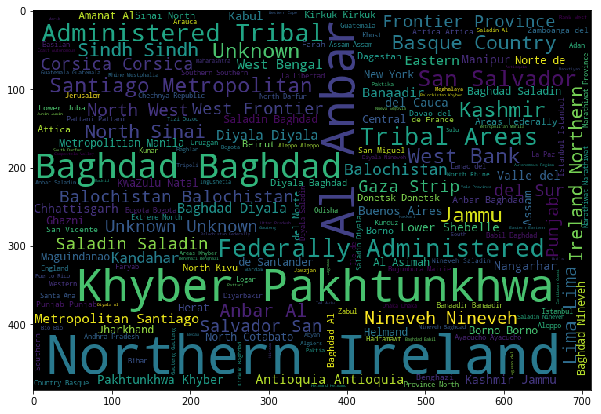

In [18]:
#Plotting Image
from wordcloud import WordCloud
from scipy import signal
cities = df.State.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'Black',
                     width = 712,
                     height = 484).generate(' '.join(cities))
plt.axis('on')
plt.imshow(wordcloud)
plt.show()

In [19]:
#Year wise count
df['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visualization

## 1. Number Of Terrorist Activities Each Year

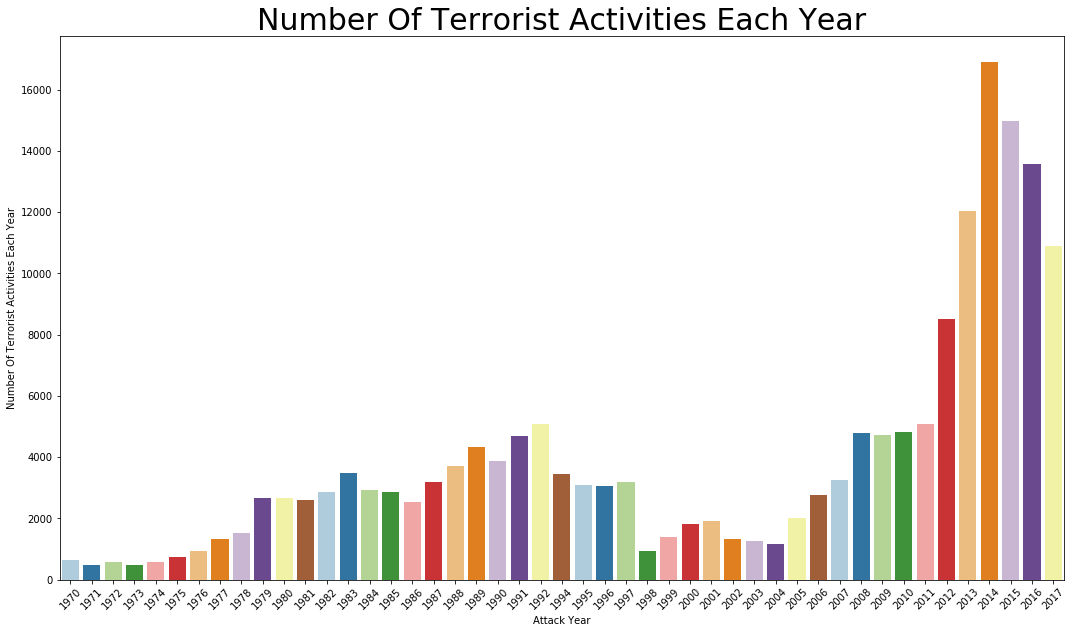

In [47]:
#Terrorist Attack
x_year = df['Year'].unique()
y_count_years = df['Year'].value_counts(dropna = True).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'Paired')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number Of Terrorist Activities Each Year')
plt.title('Number Of Terrorist Activities Each Year')
plt.title('Number Of Terrorist Activities Each Year',fontsize=30)
plt.show()

## 2. Number of Terrorist Activities by Region in Each Year 

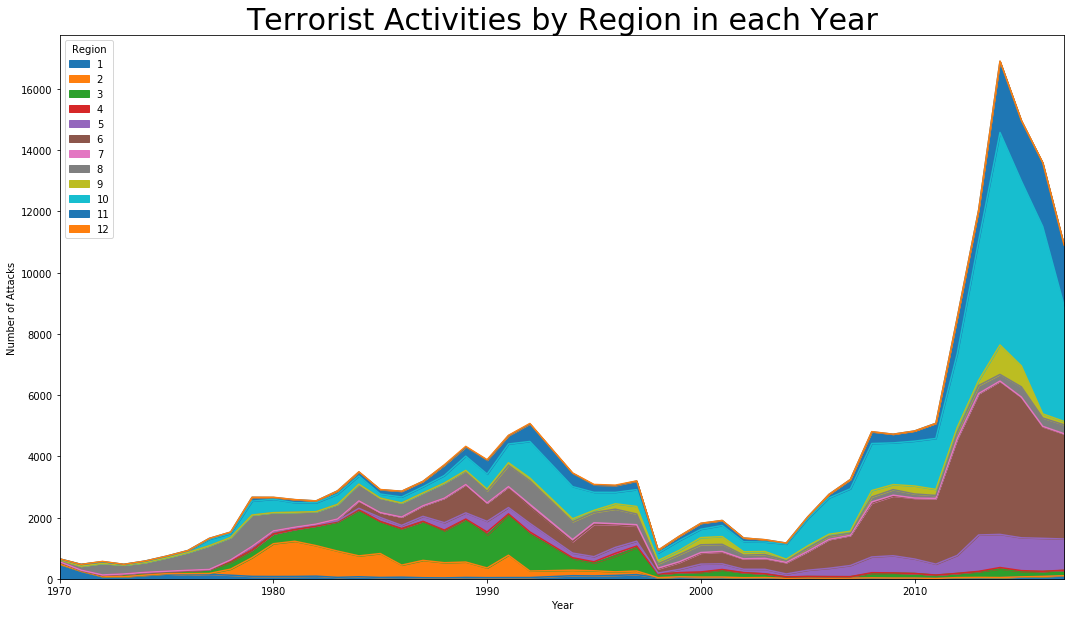

In [45]:
#Terrorist Activities by Region
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(18,10))
plt.title('Terrorist Activities by Region in each Year')
plt.title('Terrorist Activities by Region in each Year',fontsize=30)
plt.ylabel('Number of Attacks')
plt.show()

In [46]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['casualities'] = df['Killed'] + df['Wounded']

* Values are sorted by the top 40 worst terror attacks.

In [48]:
df1 = df.sort_values(by='casualities',ascending=False)[:40]

In [49]:
heat=df1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)

In [50]:
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
#Heat-Map
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#F4F6F7'], [.3, '#A3E4D7'],  [.6, '#A3E4D7'],  [1, '#A3E4D7']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [75]:
df.Country.value_counts()[:15]

95     24636
153    14368
4      12731
92     11960
45      8306
160     6908
159     6096
61      5320
603     5235
209     4292
182     4142
147     3907
205     3849
228     3347
185     3249
Name: Country, dtype: int64

## 3. Countries affected by Terror Activities

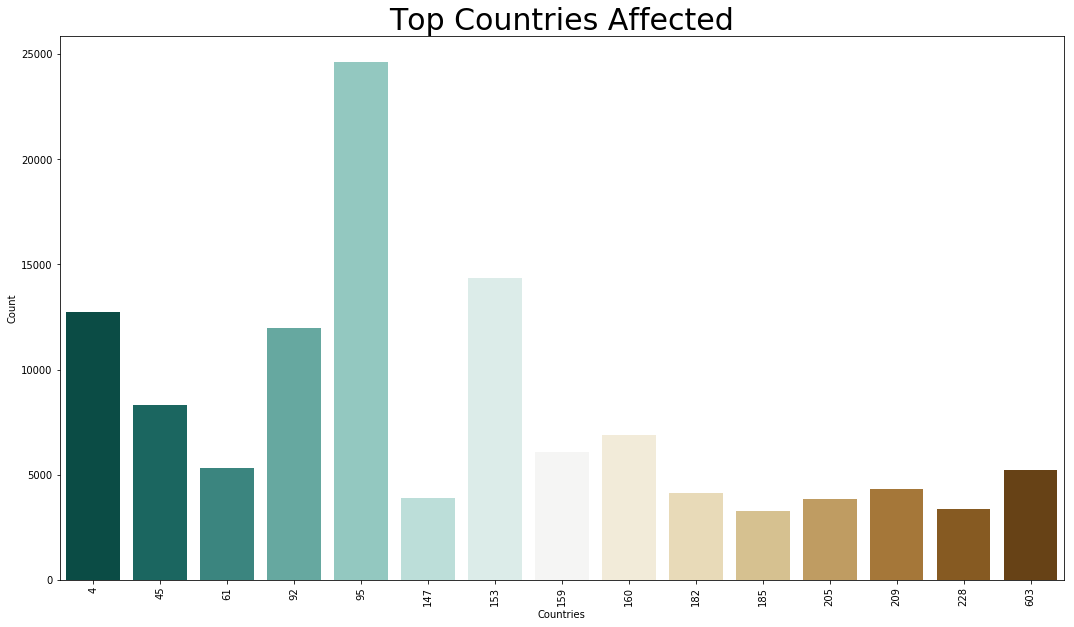

In [114]:
#Country affected by Terror
plt.subplots(figsize=(18,10))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='BrBG_r')
plt.title('Top Countries Affected')
plt.title('Top Countries Affected',fontsize=30)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## 4. Number of Death in Each Year

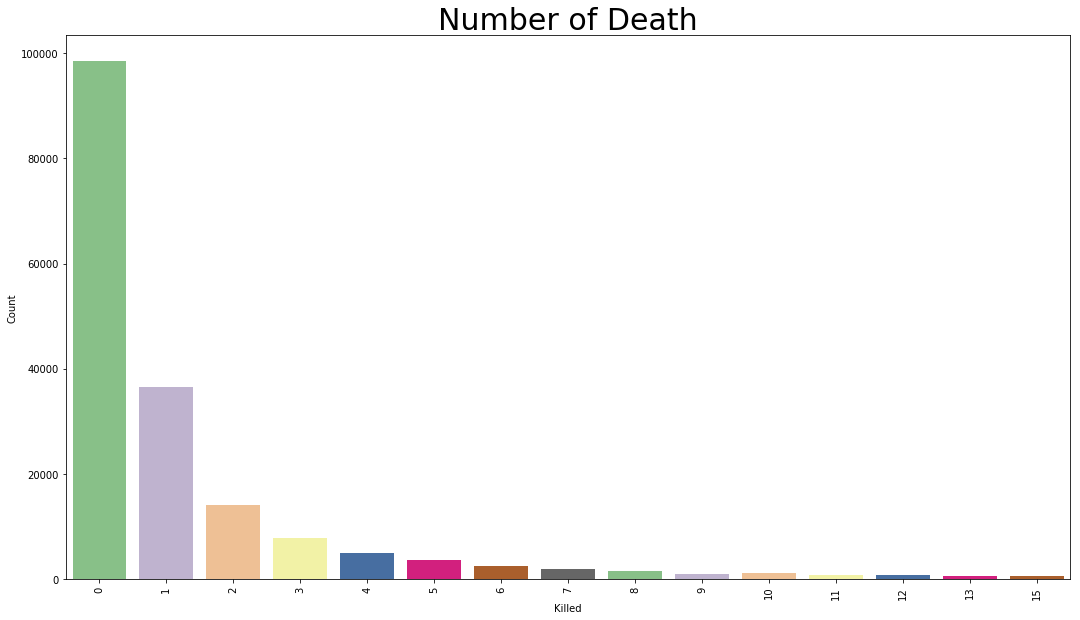

In [118]:
#Death
plt.subplots(figsize=(18,10))
sns.barplot(df['Killed'].value_counts()[:15].index,df['Killed'].value_counts()[:15].values,palette='Accent')
plt.title('Number of Death')
plt.title('Number of Death',fontsize=30)
plt.xlabel('Killed')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## 5. Number of Injuries in Each Year

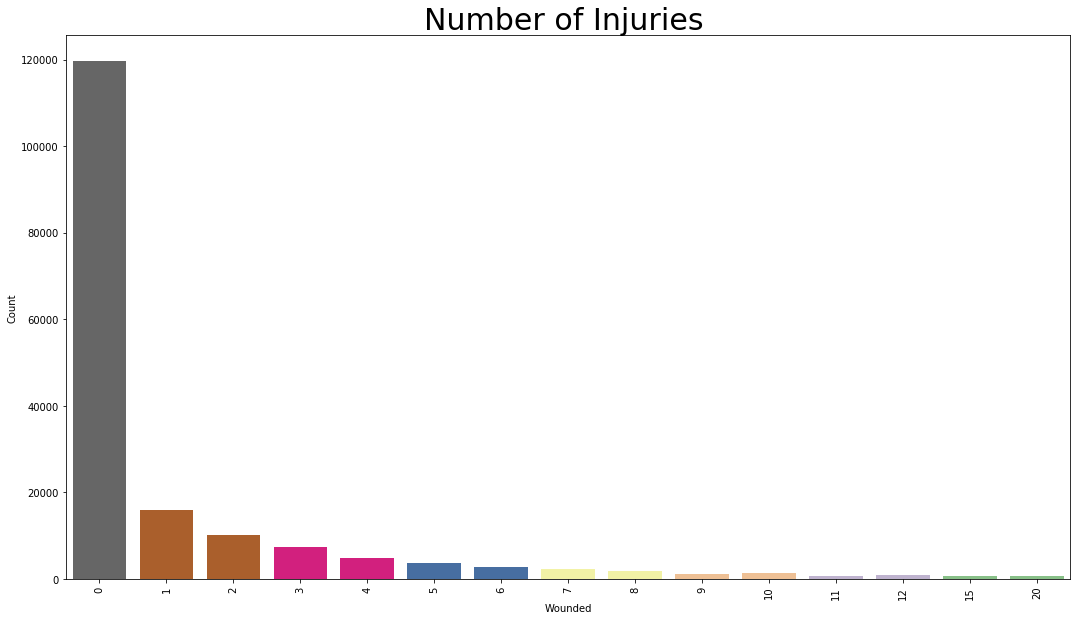

In [117]:
#Injuries 
plt.subplots(figsize=(18,10))
sns.barplot(df['Wounded'].value_counts()[:15].index,df['Wounded'].value_counts()[:15].values,palette='Accent_r')
plt.title('Number of Injuries ')
plt.title('Number of Injuries ',fontsize=30)
plt.xlabel('Wounded')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

# Data Analysis on Customized Data

## 1. Terrorist Attacks of a Particular year and their Locations

In [121]:
import folium
from folium.plugins import MarkerCluster 

In [123]:
filterYear = df['Year'] == 1970

In [125]:
#Filter data
filterData = df[filterYear] 
# filterData.info()
#We are getting the required fields
reqFilterData = filterData.loc[:,'City':'Longitude']
#Drop NaN values in latitude and longitude
reqFilterData = reqFilterData.dropna()
#ReqFilter DataList
reqFilterDataList = reqFilterData.values.tolist()  

In [126]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
#Clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

* 84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

#### Now let us check out which terrorist organizations have carried out their operations in each country. A value count would give us the terrorist organizations that have carried out the most attacks. we have indexed from 1 as to negate the value of 'Unknown'

In [127]:
df.Group.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [129]:
test = df[df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [130]:
test.Country.unique()

array([159,  26,  45,  11,  30, 130,   4, 153, 200,  95, 209, 208, 110,
       210,  97,  21,  60, 113, 173, 155,  69,  18, 102, 182,  75, 228,
       160, 121,  93, 167,  74, 603,  94,  14], dtype=int64)

In [134]:
df_df_group = df.dropna(subset=['Latitude','Longitude'])

In [135]:
df_df_group = df_df_group.drop_duplicates(subset=['Country','Group'])

In [136]:
terrorist_groups = df.Group.value_counts()[1:8].index.tolist()
df_df_group = df_df_group.loc[df_df_group.Group.isin(terrorist_groups)]
print(df_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [140]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
#Clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(df_df_group)):
    folium.Marker([df_df_group.iloc[i]['Latitude'],df_df_group.iloc[i]['Longitude']], 
                  popup='Group:{}<br>Country:{}'.format(df_df_group.iloc[i]['Group'], 
                  df_df_group.iloc[i]['Country'])).add_to(map)
map

* The Above map looks untidy even though it can be zoomed in to view the Country in question. Hence in the next chart, I have used Folium's Marker Cluster to cluster these icons. This makes it visually pleasing and highly interactive.

In [143]:
m1 = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(df_df_group)):
    marker=folium.Marker([df_df_group.iloc[i]['Latitude'],df_df_group.iloc[i]['Longitude']]) 
    popup='Group:{}<br>Country:{}'.format(df_df_group.iloc[i]['Group'],
                                          df_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('Mapbox Bright').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)

m1

In [144]:
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,58,NaN,2,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,130,Federal,1,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,160,Tarlac,5,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,78,Attica,8,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,101,Fukouka,4,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [157]:
#Total Number of people killed in Terror Attack
killData = df.loc[:,'Killed']
#Drop the NaN values
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [158]:
#Look at what types of Attacks these Deaths were made
attackData = df.loc[:,'AttackType']
#Attack Dataset
typeKillData = pd.concat([attackData, killData], axis=1)

In [159]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [160]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [161]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
Armed Assault                          1 non-null int32
Assassination                          1 non-null int32
Bombing/Explosion                      1 non-null int32
Facility/Infrastructure Attack         1 non-null int32
Hijacking                              1 non-null int32
Hostage Taking (Barricade Incident)    1 non-null int32
Hostage Taking (Kidnapping)            1 non-null int32
Unarmed Assault                        1 non-null int32
Unknown                                1 non-null int32
dtypes: int32(9)
memory usage: 44.0+ bytes


## 2. Number of Killed in Terrorist Attacks by Countries

In [175]:
df.head(2)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,58,NaN,2,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,130,Federal,1,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0


In [177]:
#Number of Killed in Terrorist Attacks by Countries
countryData = df.loc[:,'Country']
#CountyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [178]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,4,5,6,7,8,10,11,12,14,15,...,428,499,532,603,604,605,1001,1002,1003,1004
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,81,2,0,3410,324,15,3,1,83,2634


In [179]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

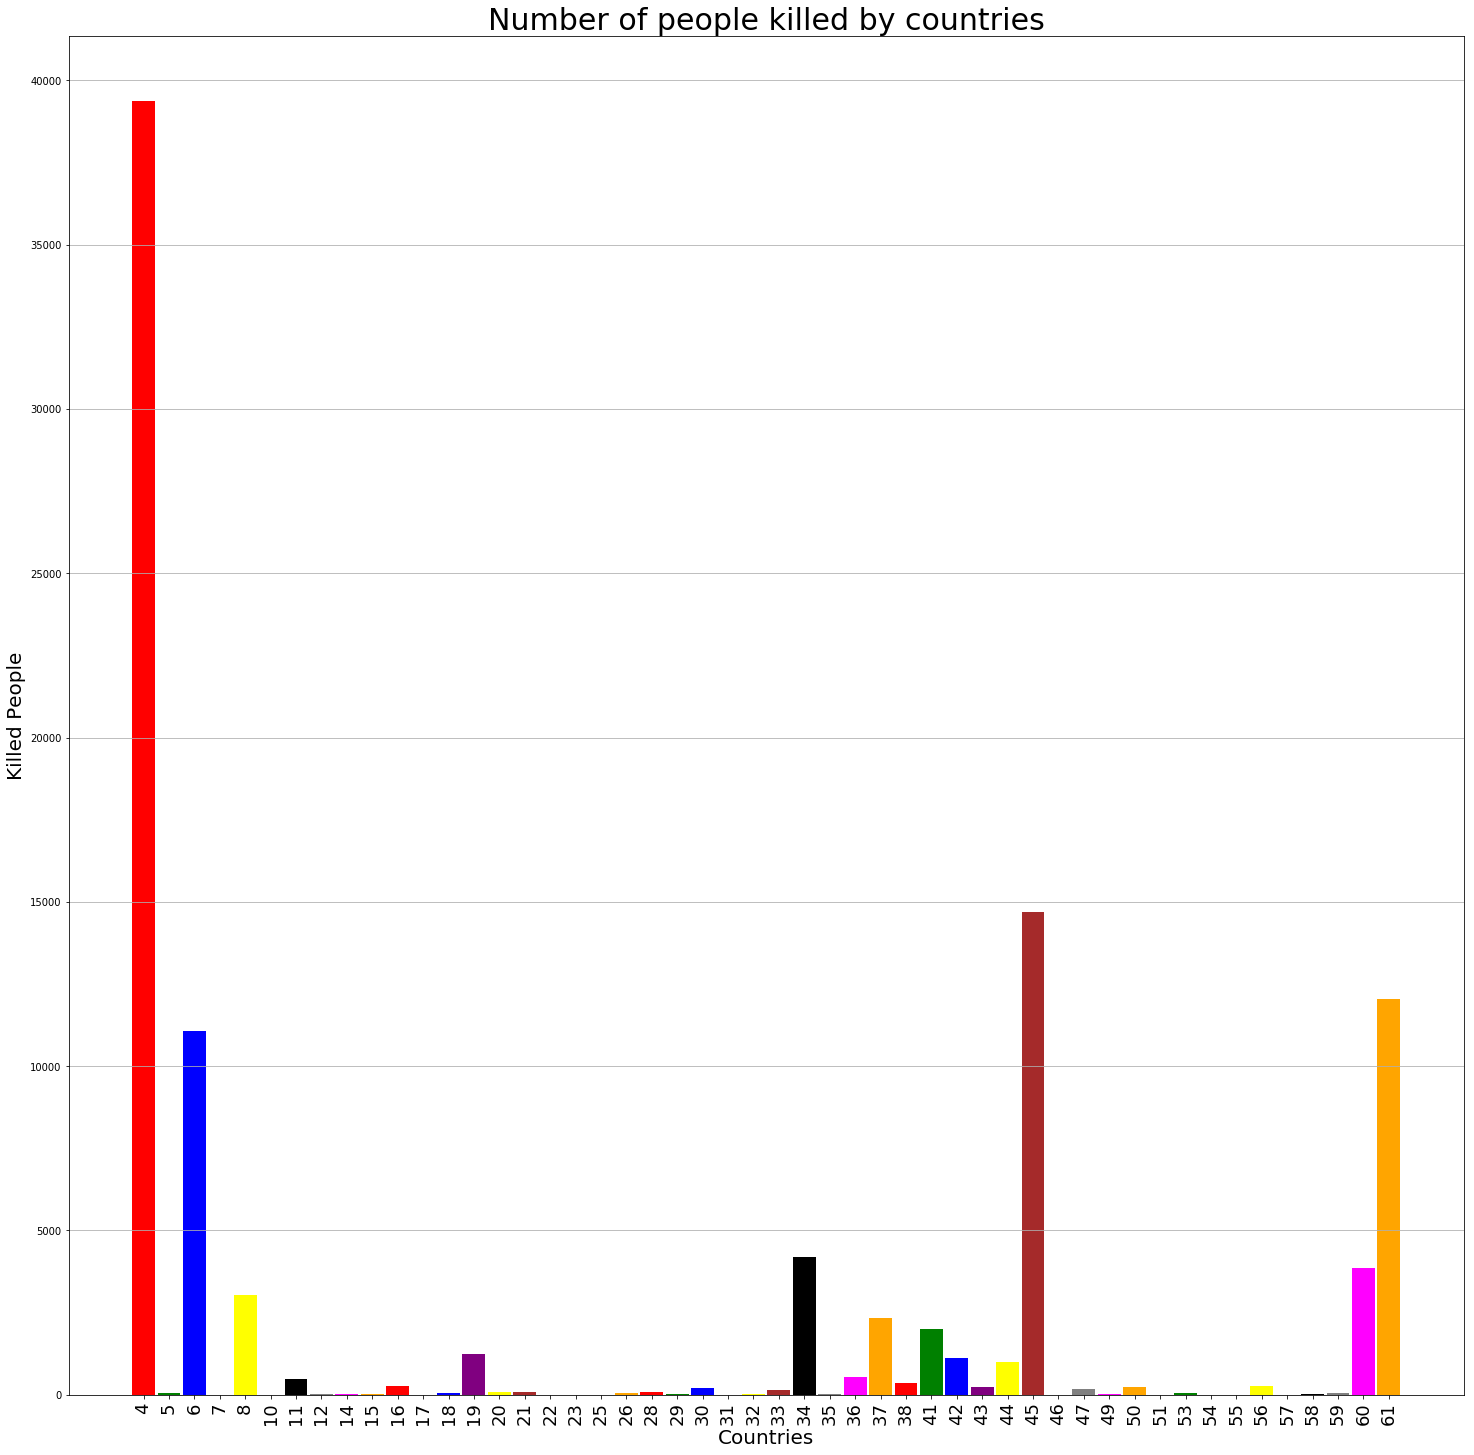

In [183]:
labels = countryKillFormatData.columns.tolist()
#50 Bar provides nice view
labels = labels[:50] 
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
#Convert float to int
values = [int(i[0]) for i in values] 
#Color list for bar chart bar color 
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 30)
plt.show()

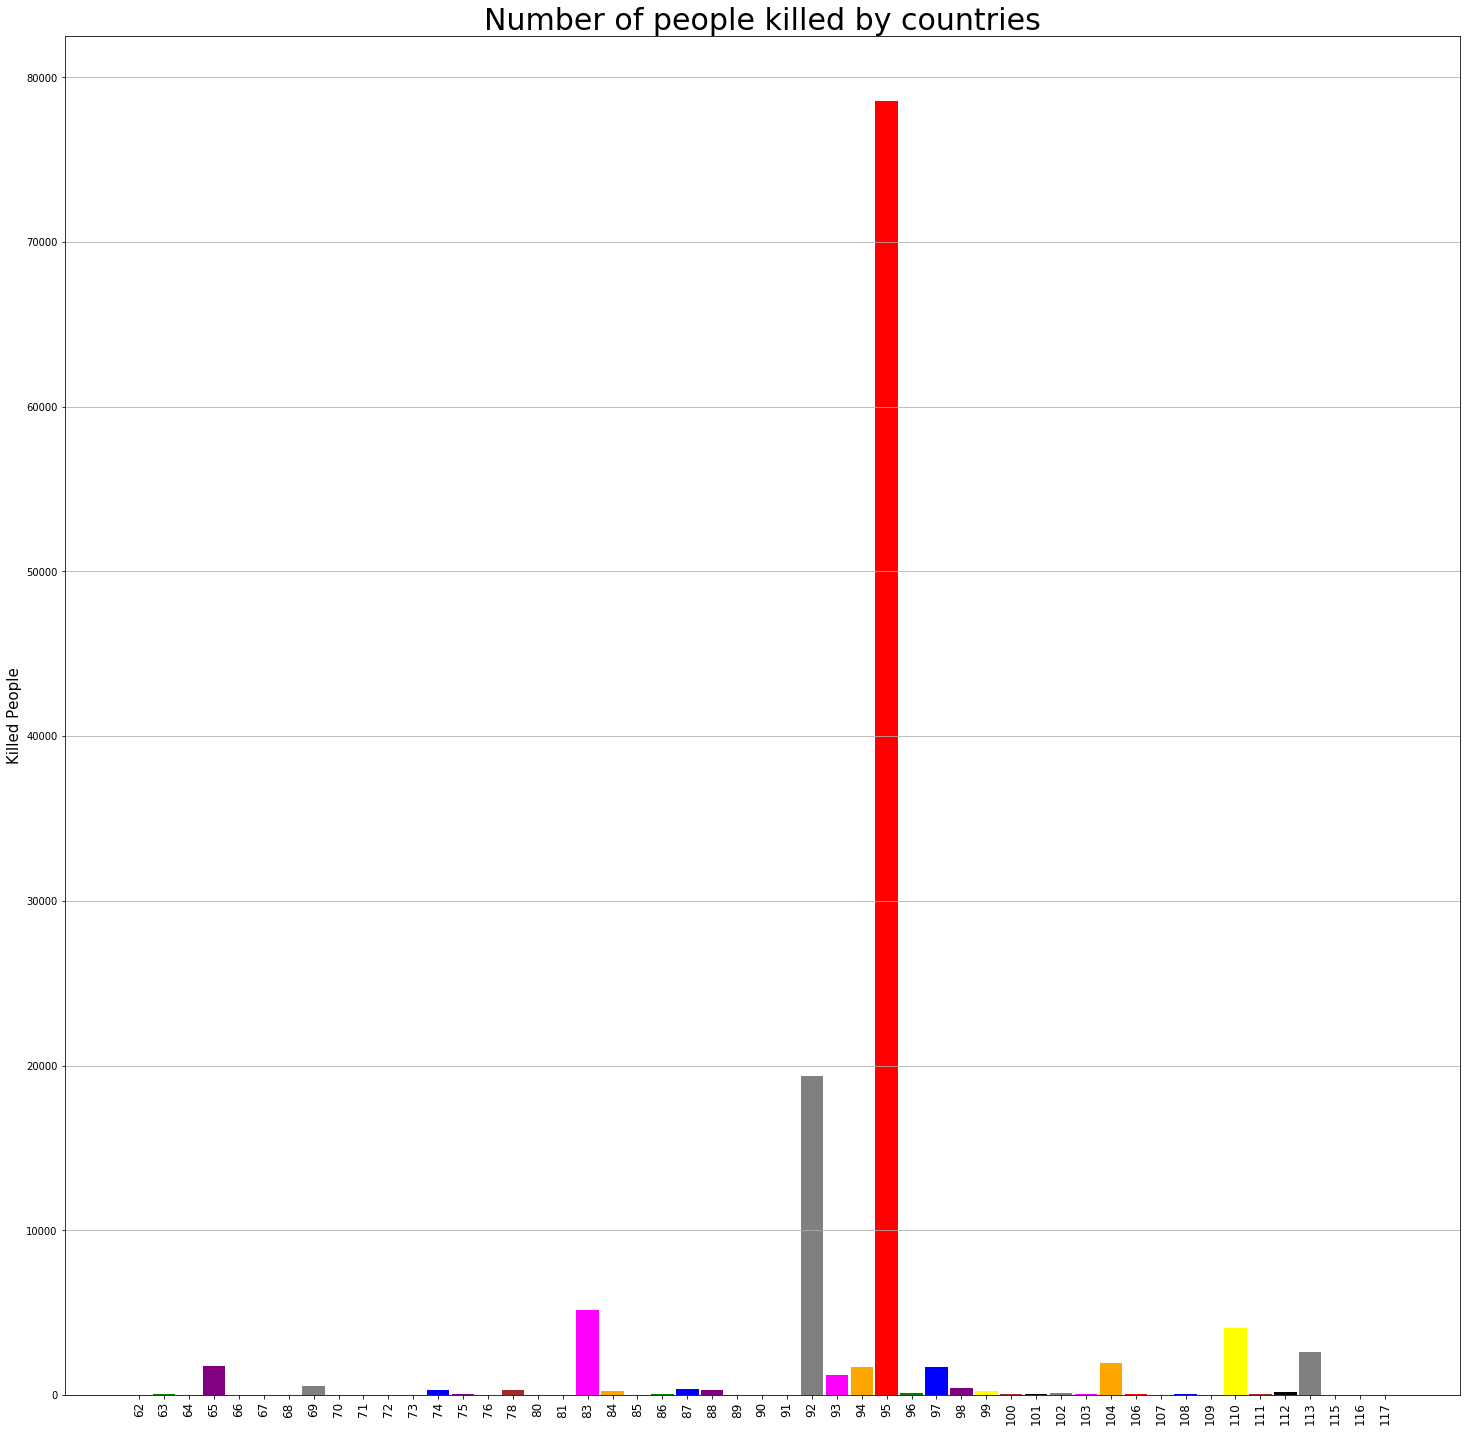

In [187]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries', fontsize = 30)
plt.show()

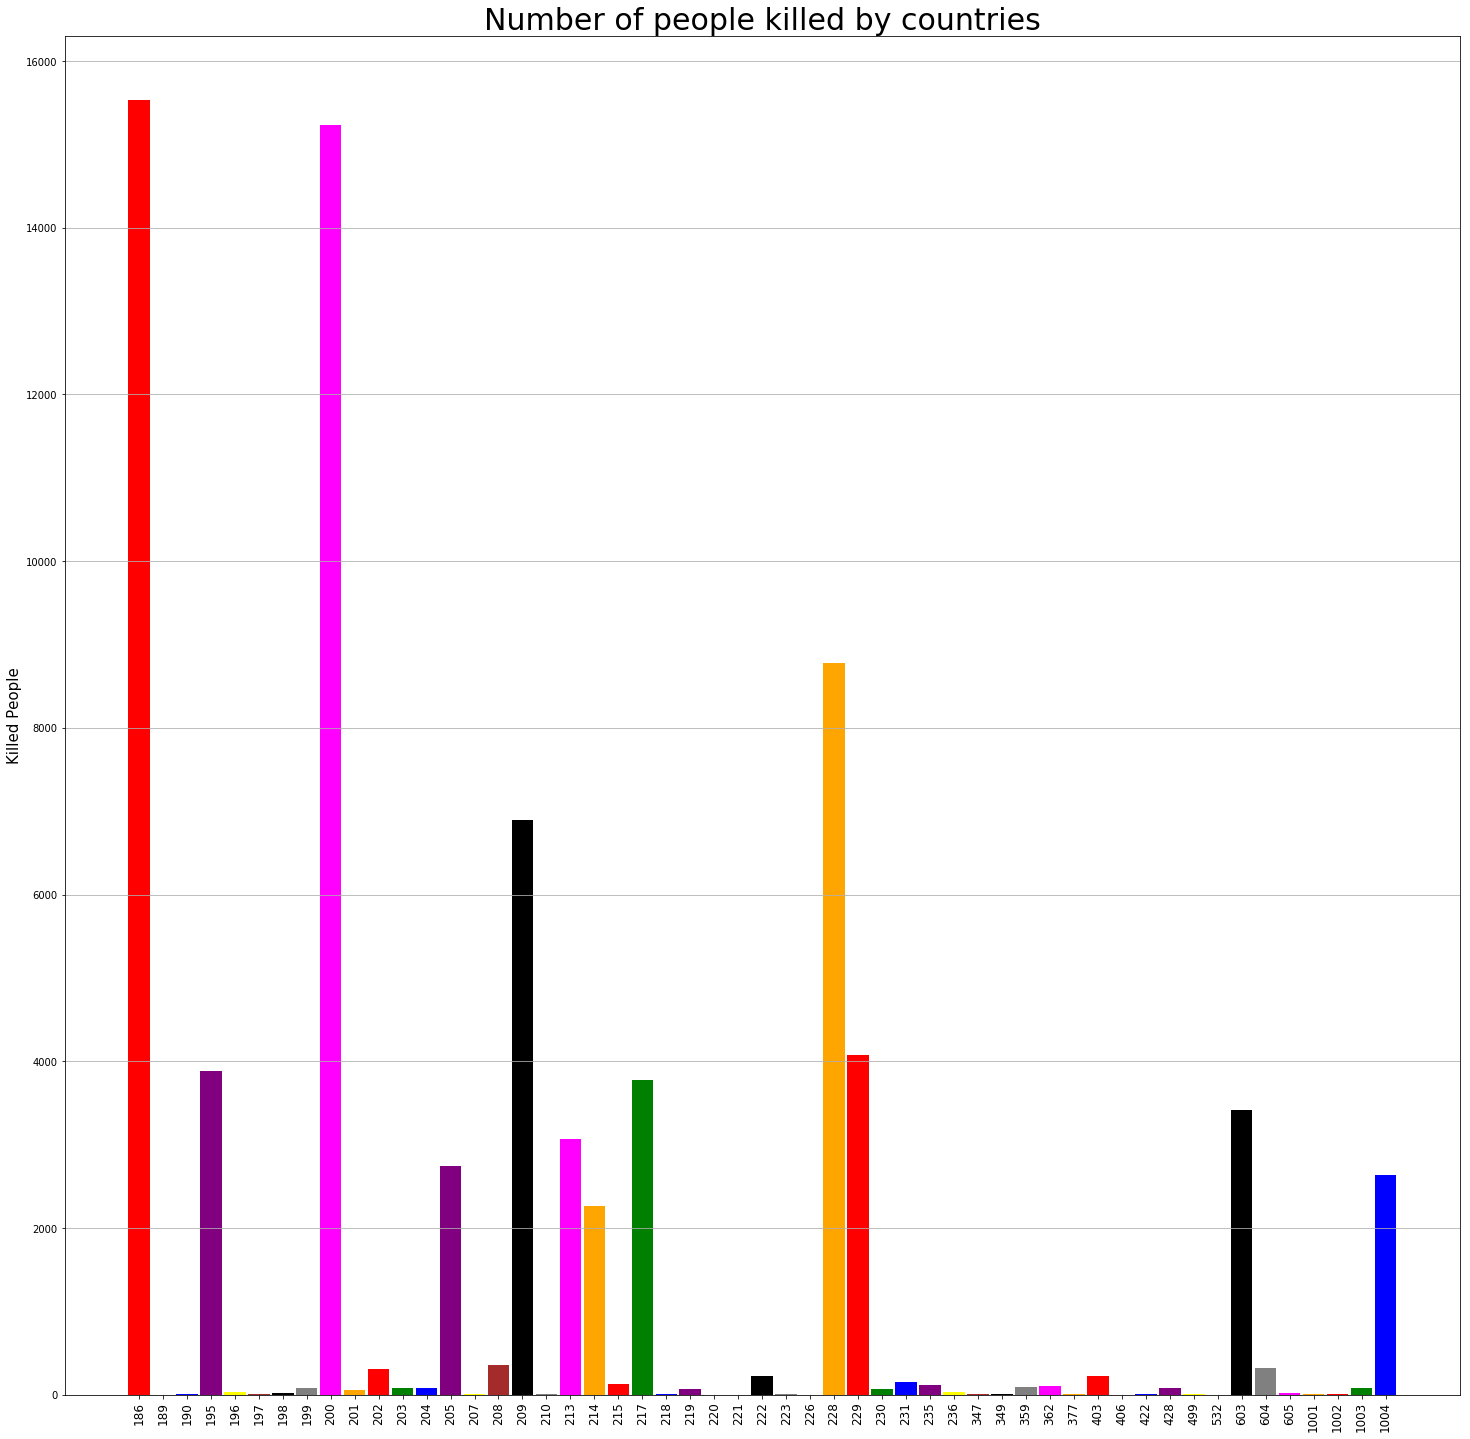

In [188]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries', fontsize = 30)
plt.show()

* Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.

# Thank You!!